## Flight Price Prediction

In [1]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_excel(r'C:\Users\DELL\Desktop\Datatrained Projects\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

## Exploratory Data Analysis (EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# Checking Data types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
#columns name
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
# Checking Null Values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.shape

(10682, 11)

In [10]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


There are 4 columns('Date_of_Journey', 'Dep_Time', 'Arrival_Time	', 'Duration') that we need to process 

In [11]:
#Separating the "Date_of_Journey" column in year, month and day column
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['year'] = df['Date_of_Journey'].dt.year
df['month'] = df['Date_of_Journey'].dt.month
df['day'] = df['Date_of_Journey'].dt.day

In [12]:
#After separating drop the 'Date_of_Journey' column
df.drop('Date_of_Journey', axis = 1, inplace = True)

In [13]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5


In [14]:
df["year"].value_counts()

2019    10682
Name: year, dtype: int64

In [15]:
# dropping the year column also
df.drop('year', axis = 1, inplace = True)

In [16]:
df.shape

(10682, 12)

In [17]:
#Separating the 'Dep_Time' column in hour and min column
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [18]:
#After separating drop the 'Dep_Time' column
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [19]:
df.shape

(10682, 13)

In [20]:
# #Separating the 'Arrival_Time' column in hour and min column
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

In [21]:
# After separating drop the 'Arrival_Time' column
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
df.shape

(10682, 14)

In [23]:
# converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extract minutes 

In [24]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [25]:
df.drop(["Duration"], axis = 1, inplace = True)

In [26]:
df.shape

(10682, 15)

In [27]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   month            10682 non-null  int64 
 8   day              10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [29]:
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Total_Stops           5
Additional_Info      10
Price              1870
month                 7
day                   9
Dep_hour             24
Dep_min              12
Arrival_hour         24
Arrival_min          12
Duration_hours       44
Duration_mins        12
dtype: int64

### Visualization

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


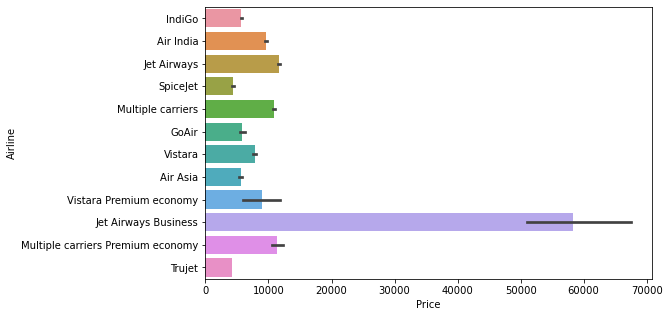

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y="Airline",x='Price', data=df)
print(df["Airline"].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


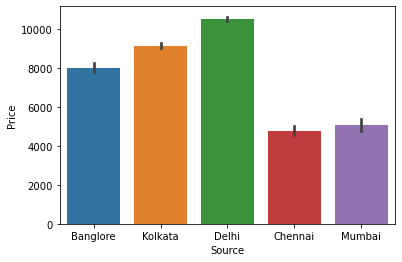

In [31]:
#plt.figure(figsize=(10,5))
sns.barplot(x="Source",y='Price', data=df)
print(df["Source"].value_counts())

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


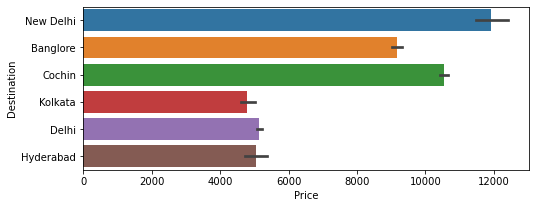

In [32]:
plt.figure(figsize=(8,3))
sns.barplot(y="Destination",x='Price', data=df)
print(df["Destination"].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


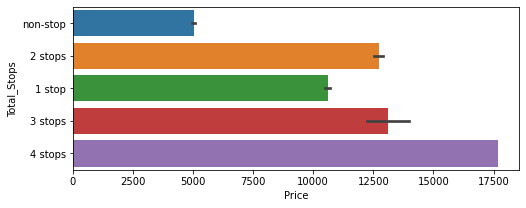

In [33]:
plt.figure(figsize=(8,3))
sns.barplot(y="Total_Stops",x='Price', data=df)
print(df["Total_Stops"].value_counts())

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64


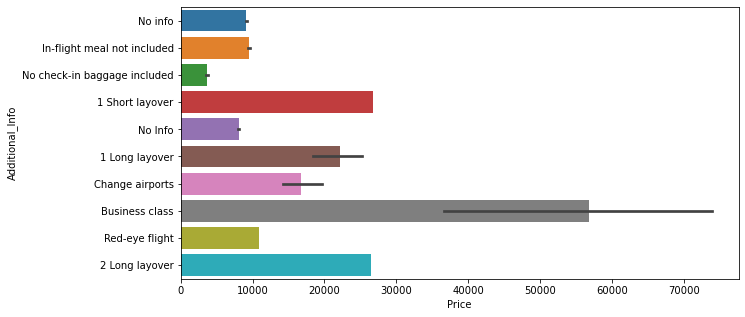

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(y="Additional_Info",x='Price', data=df)
print(df["Additional_Info"].value_counts())

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64


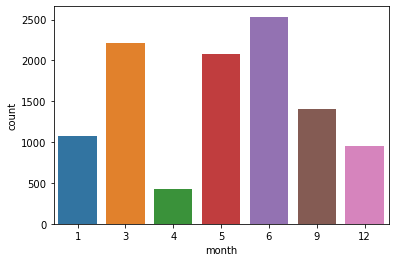

In [35]:
ax = sns.countplot (x = "month", data = df)
print(df["month"].value_counts())

6     2166
5     1391
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: day, dtype: int64


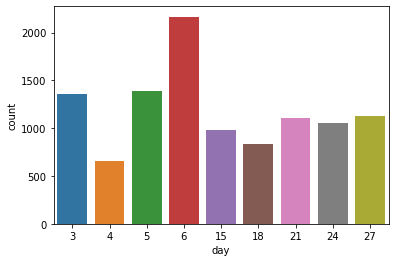

In [36]:
ax = sns.countplot (x = "day", data = df)
print(df["day"].value_counts())

In [37]:
df.select_dtypes(include=['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [38]:
#Route and Total_Stops are related to each other
df.drop(["Route"], axis = 1, inplace = True)

In [39]:
df.shape

(10682, 14)

In [40]:
#Encoding of Dataframe:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'):
    df[i] = le.fit_transform(df[i])

In [41]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,8,3897,3,24,22,20,1,10,2,50
1,1,3,0,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,8,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,19,55,22,25,2,30
10679,1,3,0,4,8,4145,4,27,20,45,23,20,2,35
10680,4,0,2,4,8,7229,4,27,8,20,11,20,3,0
10681,10,0,5,4,8,12648,1,3,11,30,14,10,2,40


In [42]:
#Corelation
df.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.013397,0.018446,0.035973,-0.060748,-0.039565,-0.007900,0.031118,-0.035269,-0.059922,-0.007567,-0.071092,-0.158136,-0.028009
Source,-0.013397,1.000000,-0.592576,-0.225605,-0.022109,0.015999,0.063052,0.007563,0.059047,-0.056998,0.025635,0.021040,0.166121,-0.145193
Destination,0.018446,-0.592576,1.000000,0.337872,0.026821,-0.071122,-0.105035,-0.052102,-0.072997,0.127931,-0.039729,0.017196,-0.258446,0.061235
Total_Stops,0.035973,-0.225605,0.337872,1.000000,0.164054,-0.571221,-0.056514,0.043844,0.039224,0.048901,-0.095650,0.175980,-0.606137,0.182223
Additional_Info,-0.060748,-0.022109,0.026821,0.164054,1.000000,-0.065463,-0.009105,-0.019416,-0.050983,-0.019392,0.026204,0.041310,-0.168815,0.046910
Price,-0.039565,0.015999,-0.071122,-0.571221,-0.065463,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
month,-0.007900,0.063052,-0.105035,-0.056514,-0.009105,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
day,0.031118,0.007563,-0.052102,0.043844,-0.019416,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Dep_hour,-0.035269,0.059047,-0.072997,0.039224,-0.050983,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.059922,-0.056998,0.127931,0.048901,-0.019392,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485


<AxesSubplot:>

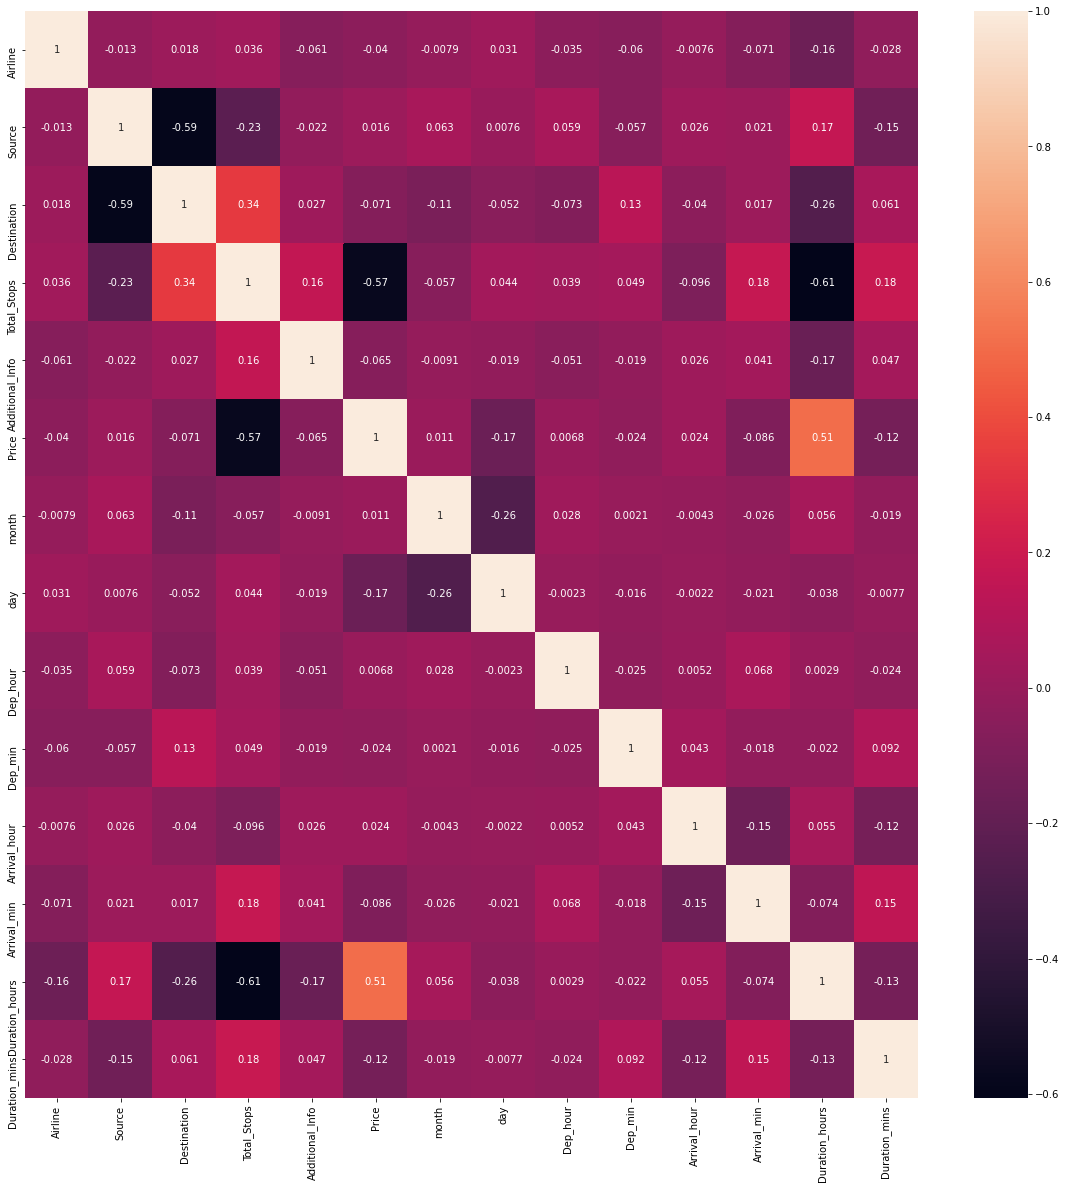

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

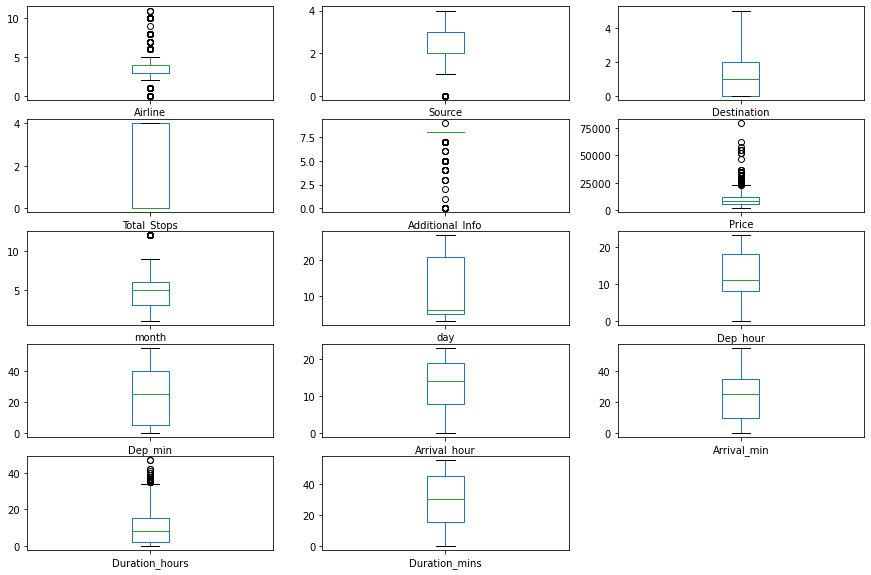

In [44]:
# Outliers Checking
df.plot(kind='box', subplots = True, layout=(5,3), figsize=(15,10));

In [45]:
df.shape

(10682, 14)

In [46]:
# Considering the outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z<3)

(array([    0,     0,     0, ..., 10681, 10681, 10681], dtype=int64),
 array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))

In [47]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,4,8,3897,3,24,22,20,1,10,2,50
1,1,3,0,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,0,8,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,19,55,22,25,2,30
10679,1,3,0,4,8,4145,4,27,20,45,23,20,2,35
10680,4,0,2,4,8,7229,4,27,8,20,11,20,3,0
10681,10,0,5,4,8,12648,1,3,11,30,14,10,2,40


In [48]:
df_new_z.shape

(10512, 14)

In [49]:
#Percentage loss of data:
Data_loss=((10682 - 10512)/10682)*100
Data_loss

1.5914622729825876

data loss is only 1.59 percent so, we can remove the outliers

In [50]:
df=df_new_z

In [76]:
#Separating the columns into features and target:

x=df.drop('Price',axis=1)
y=df['Price']

In [52]:
#Spliting data by train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)


In [53]:
# Scaling Data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Building

In [64]:
# linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.4697934777257674

In [65]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7410847021656943

In [67]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.6177814239318933

In [68]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.6293254722702939

In [69]:
# AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.6184594556416114

In [71]:
# Testing with GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.8148628035500894

In [72]:
# Model Results
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.469793
1,KNeighbors,0.741085
2,Decision Tree,0.617781
3,RandomForest,0.629325
4,AdaBoost,0.618459
5,GradientBoosting,0.814863


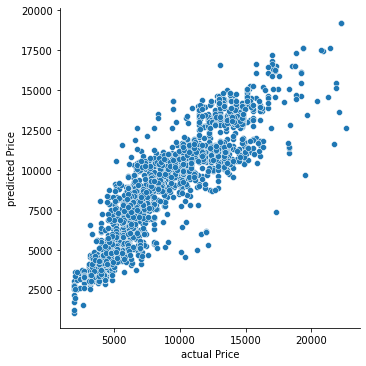

In [74]:
prediction= pd.DataFrame({'actual Price': y_test, 'predicted Price': y_pred})
sns.relplot(data=prediction, x='actual Price', y='predicted Price')

In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1278.1886417330313
MSE: 3073960.8069861364
RMSE: 1753.2714584416574


In [ ]:
import pickle
filename = 'flight_price.pkl'
pickle.dump(rf, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('flight_price.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

In [ ]:
from sklearn.ensemble import

In [ ]:
metrics.r2_score(y_test,y_prediction)

In [329]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [330]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
Predicted,13342.73,7085.7,4759.85,7579.05,7459.8,7075.89,11860.38,6634.99,7473.373667,12150.884167,...,11474.61,6096.82,19128.32,16974.68,13819.84,3998.66,11165.75,6846.49,7059.69,14755.8
Orginal,13342.73,7085.7,4759.85,7579.05,7459.8,7075.89,11860.38,6634.99,7473.373667,12150.884167,...,11474.61,6096.82,19128.32,16974.68,13819.84,3998.66,11165.75,6846.49,7059.69,14755.8
